In [1]:

import pandas as pd

df = pd.read_csv('tree.csv')






In [2]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Days          8 non-null      int64 
 1   Outlook       8 non-null      object
 2   Temprature    8 non-null      object
 3   Routine       8 non-null      object
 4   Wear Jacket?  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [4]:
x = df.drop(['Wear Jacket?','Days'],axis=1)
# x = df.drop(['Wear Jacket?','Days'],axis=1)


In [5]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [6]:
y = df['Wear Jacket?']

y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

# Data Preprocess

In [7]:
from sklearn.preprocessing import LabelEncoder

lr = LabelEncoder()



In [8]:
lr

LabelEncoder()

In [9]:
x.Outlook = lr.fit_transform(x.Outlook)

In [10]:
x.Temprature = lr.fit_transform(x.Temprature)

In [11]:
x.Routine = lr.fit_transform(x.Routine)

In [12]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [13]:
from sklearn.tree import DecisionTreeClassifier


tr = DecisionTreeClassifier()



In [14]:
tr.fit(x,y)

tr

DecisionTreeClassifier()

In [15]:
from sklearn import tree
# tree.polt_tree(tr,filled=True)





[Text(372.0, 475.65000000000003, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(279.0, 339.75, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(186.0, 203.85000000000002, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(93.0, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(372.0, 203.85000000000002, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(465.0, 339.75, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

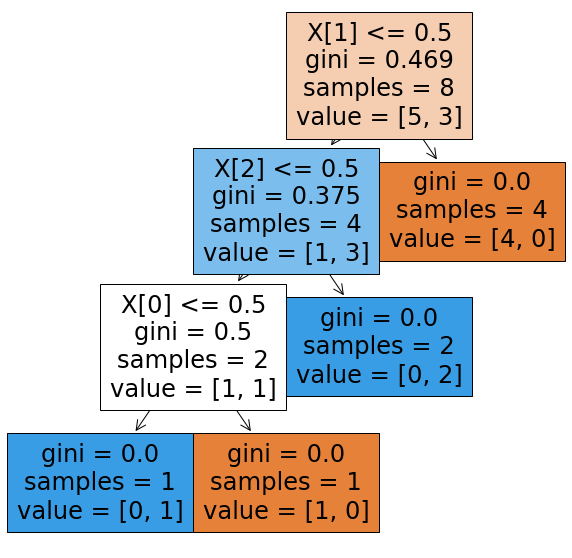

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(tr,filled=True)

In [25]:
tr.predict([[1,0,0]])

array(['No'], dtype=object)

In [26]:
text = tree.export_text(tr)

In [27]:
tr

DecisionTreeClassifier()

'|--- feature_1 <= 0.50\n|   |--- feature_2 <= 0.50\n|   |   |--- feature_0 <= 0.50\n|   |   |   |--- class: Yes\n|   |   |--- feature_0 >  0.50\n|   |   |   |--- class: No\n|   |--- feature_2 >  0.50\n|   |   |--- class: Yes\n|--- feature_1 >  0.50\n|   |--- class: No\n'

In [29]:
print(text)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: Yes
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: No
|   |--- feature_2 >  0.50
|   |   |--- class: Yes
|--- feature_1 >  0.50
|   |--- class: No

